In [1]:
import pandas as pd
import numpy as np
import os
import ast

import matplotlib.pyplot as plt

from utils_mitgcm import open_mitgcm_ds_from_config

In [2]:
model = 'geneva_200m'
params_file = 'swirl_03'
output_folder = r'../Outputs'

# Import catalogues

In [12]:
level2a_data = pd.read_csv(os.path.join(output_folder, f'{model}_{params_file}_day1_lvl2a.csv'))

# Open MITgcm results

In [13]:
mitgcm_config, ds_mitgcm = open_mitgcm_ds_from_config('../config.json', model)

# Display eddy centers

In [14]:
def interpolate_value_from_index(coord_array_1d, index):
    return np.interp(index, np.arange(len(coord_array_1d)), coord_array_1d)

In [15]:
def get_eddy_center_trajectory(level2a_data, eddy_index, ds_mitgcm):
    sel_eddy = level2a_data.iloc[eddy_index]
    
    i_c =  ast.literal_eval(sel_eddy['xc(t)'])
    j_c =  ast.literal_eval(sel_eddy['yc(t)'])
    
    x_c = interpolate_value_from_index(ds_mitgcm['XC'].values, i_c)
    y_c = interpolate_value_from_index(ds_mitgcm['YC'].values, j_c)
    
    return (x_c, y_c)

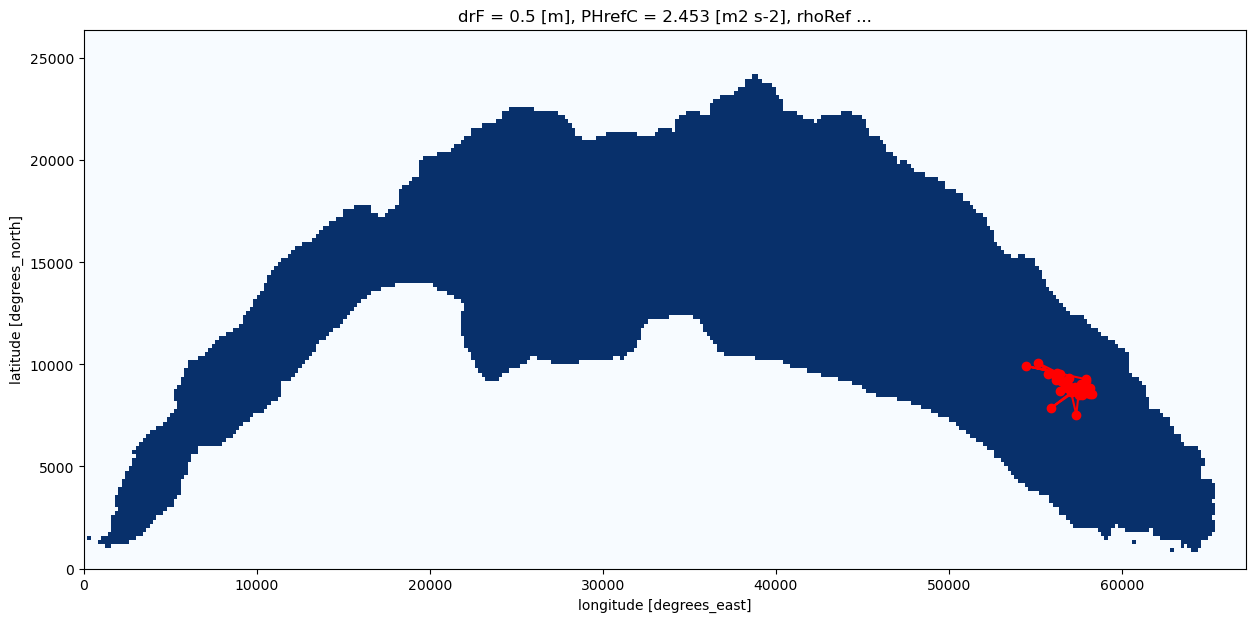

In [16]:
plt.figure(figsize=(15,7))
ds_mitgcm.isel(time=0, Z=0)['THETA'].plot(cmap='Blues', vmin=0, vmax=1, add_colorbar=False)

eddy_index =0

x_c, y_c = get_eddy_center_trajectory(level2a_data, eddy_index, ds_mitgcm)    
plt.plot(x_c, y_c, marker='o', c='r')

In [88]:
level2a_data.iloc[eddy_index]

id                                                                       39
id_lvl1                                                 [46, 223, 230, 406]
time_indices(t)                                                [0, 1, 1, 2]
dates(t)                  ['2023-07-01 12:00:00', '2023-07-01 12:59:44',...
xc(t)                     [255.25142064807065, 254.6909907397795, 244.69...
yc(t)                     [65.05847951514808, 66.07469713379383, 49.9750...
depth_min(t)_[m]          [-29.982500076293945, -35.93949890136719, -28....
depth_max(t)_[m]          [-23.482999801635746, -23.482999801635746, -27...
volume(t)_[m3]              [14196560.0, 18293279.75, 2696940.0, 2152800.0]
rotation_direction                                                clockwise
kinetic_energy(t)_[MJ]    [0.0033146188134561, 0.0036656304908794, 0.000...
lifespan_[h]                                                            3.0
Name: 39, dtype: object